# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [6]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import scipy.stats as stats

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [8]:
# Importing the file porter_data_1.csv
df = pd.read_csv('porter_data_1.csv')
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [9]:
df.describe().T

count         mean          std   min      25%  \
market_id                 175777.0     2.743726     1.330963   1.0     2.00   
store_primary_category    175777.0    35.887949    20.728254   0.0    18.00   
order_protocol            175777.0     2.911752     1.513128   1.0     1.00   
total_items               175777.0     3.204976     2.674055   1.0     2.00   
subtotal                  175777.0  2697.111147  1828.554893   0.0  1412.00   
num_distinct_items        175777.0     2.675060     1.625681   1.0     1.00   
min_item_price            175777.0   684.965433   519.882924 -86.0   299.00   
max_item_price            175777.0  1160.158616   560.828571   0.0   799.00   
total_onshift_dashers     175777.0    44.918664    34.544724  -4.0    17.00   
total_busy_dashers        175777.0    41.861381    32.168505  -5.0    15.00   
total_outstanding_orders  175777.0    58.230115    52.731043  -6.0    17.00   
distance                  175777.0    21.843090     8.748712   0.0    15.36   

                              50%      75%       max  
market_id                    2.00     4.00      6.00  
store_primary_category      38.00    55.00     72.00  
order_protocol               3.00     4.00      7.00  
total_items                  3.00     4.00    411.00  
subtotal                  2224.00  3410.00  26800.00  
num_distinct_items           2.00     3.00     20.00  
min_item_price             595.00   942.00  14700.00  
max_item_price            1095.00  1395.00  14700.00  
total_onshift_dashers       37.00    66.00    171.00  
total_busy_dashers          35.00    63.00    154.00  
total_outstanding_orders    41.00    85.00    285.00  
distance                    21.76    28.12     83.52

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [14]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

In [15]:
# Check the data types and unique value counts to identify the catogorical columns

df_info = pd.DataFrame({
    'dtype': df.dtypes,
    'n_unique': df.nunique()
})
df_info

dtype  n_unique
market_id                        float64         6
created_at                datetime64[ns]    162649
actual_delivery_time      datetime64[ns]    160344
store_primary_category             int64        73
order_protocol                   float64         7
total_items                        int64        54
subtotal                           int64      8182
num_distinct_items                 int64        20
min_item_price                     int64      2251
max_item_price                     int64      2585
total_onshift_dashers            float64       172
total_busy_dashers               float64       158
total_outstanding_orders         float64       281
distance                         float64      1318

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [17]:
# Convert categorical features to category type
categorical_cols = ['market_id', 'store_primary_category', 'order_protocol']

for cols in categorical_cols :
    df[cols] = df[cols].astype('category')

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [20]:
# Calculate time taken in minutes
df['delivery_time_minutes'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60
df.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  delivery_time_minutes  
0                      21.0     34.44                   47.0  
1                       2.0     27.60                   44.0  
2                      18.0     11.56                   55.0  
3                       8.0     31.80                   59.0  
4                       7.0      8.20                   46.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [22]:
# Extract the hour and day of week from the 'created_at' timestamp
df['order_hour'] = df['created_at'].dt.hour

df['order_day_of_week'] = df['created_at'].dt.dayofweek
df

# Create a categorical feature 'isWeekend'

df['isWeekend'] = df['order_day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

df.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  delivery_time_minutes  order_hour  \
0                      21.0     34.44                   47.0          22   
1                       2.0     27.60                   44.0          21   
2                      18.0     11.56                   55.0           0   
3                       8.0     31.80                   59.0           3   
4                       7.0      8.20                   46.0           2   

   order_day_of_week  isWeekend  
0                  4          0  
1                  1          0  
2                  0          0  
3                  3          0  
4                  1          0

In [23]:
# Drop unnecessary columns

# check the any null values
print(df.isnull().sum())

# we already extracted the meaningfull information from created_at and actual_delivery_time, we can drop the column
df.drop(['created_at', 'actual_delivery_time'], axis=1, inplace = True)
df.head()

# Let's remove the order protocol(does not matter how you order it) from the data and store primary category (Multiple values)
df.drop(['order_protocol', 'store_primary_category'], axis=1, inplace=True)

market_id                   0
created_at                  0
actual_delivery_time        0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_dashers       0
total_busy_dashers          0
total_outstanding_orders    0
distance                    0
delivery_time_minutes       0
order_hour                  0
order_day_of_week           0
isWeekend                   0
dtype: int64


#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [26]:
# Define target variable (y) and features (X)
y = df['delivery_time_minutes']

# drop the target variable and remaining will be features, will decide the number of features to consider after EDA
X = df.drop(['delivery_time_minutes'], axis=1)
X

market_id  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            2.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   
...          ...          ...       ...                 ...             ...   
175772       1.0            3      1389                   3             345   
175773       1.0            6      3010                   4             405   
175774       1.0            5      1836                   3             300   
175775       1.0            1      1175                   1             535   
175776       1.0            4      2605                   4             425   

        max_item_price  total_onshift_dashers  total_busy_dashers  \
0                 1239                   33.0                14.0   
1                 1400                    1.0                 2.0   
2                 1604                    8.0                 6.0   
3                 1525                    5.0                 6.0   
4                 2195                    5.0                 5.0   
...                ...                    ...                 ...   
175772             649                   17.0                17.0   
175773             825                   12.0                11.0   
175774             399                   39.0                41.0   
175775             535                    7.0                 7.0   
175776             750                   20.0                20.0   

        total_outstanding_orders  distance  order_hour  order_day_of_week  \
0                           21.0     34.44          22                  4   
1                            2.0     27.60          21                  1   
2                           18.0     11.56           0                  0   
3                            8.0     31.80           3                  3   
4                            7.0      8.20           2                  1   
...                          ...       ...         ...                ...   
175772                      23.0     13.24           0                  1   
175773                      14.0     36.60           0                  4   
175774                      40.0     31.80           4                  5   
175775                      12.0     15.36          18                  6   
175776                      23.0      5.36          19                  6   

        isWeekend  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
175772          0  
175773          0  
175774          1  
175775          1  
175776          1  

[175777 rows x 13 columns]

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [28]:
# Split data into training and testing sets

# Split the data into 70:30 ratio in training and testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print dataset shapes
print(f"Training set: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set: X_test: {X_test.shape}, y_test: {y_test.shape}")

Training set: X_train: (123043, 13), y_train: (123043,)
Testing set: X_test: (52734, 13), y_test: (52734,)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [31]:
# Define numerical and categorical columns for easy EDA and data manipulation
print (df.info())

# numerical columns
numerical_cols = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 
                  'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders',
                  'distance', 'order_hour']


# categorical columns
categorical_cols = ['market_id', 'order_day_of_week', 'isWeekend']



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 175777 non-null  category
 1   total_items               175777 non-null  int64   
 2   subtotal                  175777 non-null  int64   
 3   num_distinct_items        175777 non-null  int64   
 4   min_item_price            175777 non-null  int64   
 5   max_item_price            175777 non-null  int64   
 6   total_onshift_dashers     175777 non-null  float64 
 7   total_busy_dashers        175777 non-null  float64 
 8   total_outstanding_orders  175777 non-null  float64 
 9   distance                  175777 non-null  float64 
 10  delivery_time_minutes     175777 non-null  float64 
 11  order_hour                175777 non-null  int32   
 12  order_day_of_week         175777 non-null  int32   
 13  isWeekend                 175

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

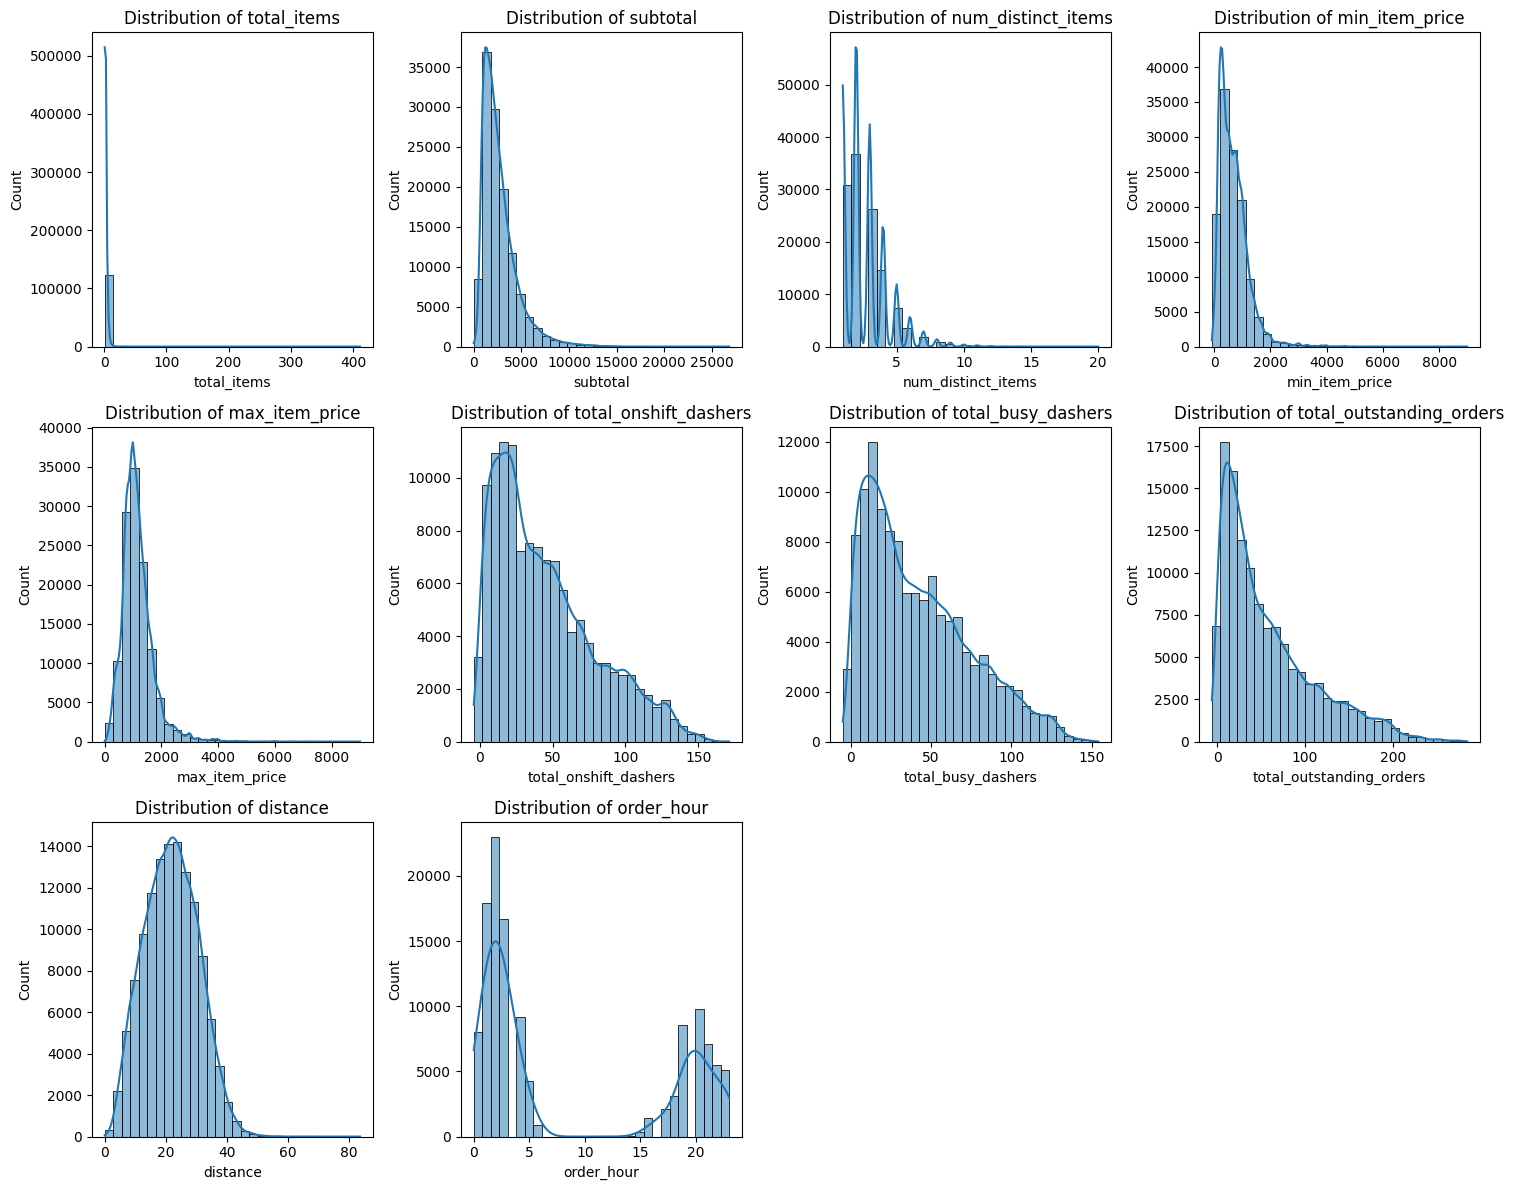

In [33]:
# Plot distributions for all numerical columns

plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)  # Create subplots (adjust based on number of columns)
    sns.histplot(X_train[col], kde=True, bins=30)  # Histogram with KDE curve
    plt.title(f'Distribution of {col}')
    
plt.tight_layout()  # Adjust subplot layout
plt.show()


In [34]:

# box plots to check outliers
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=X_train[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()



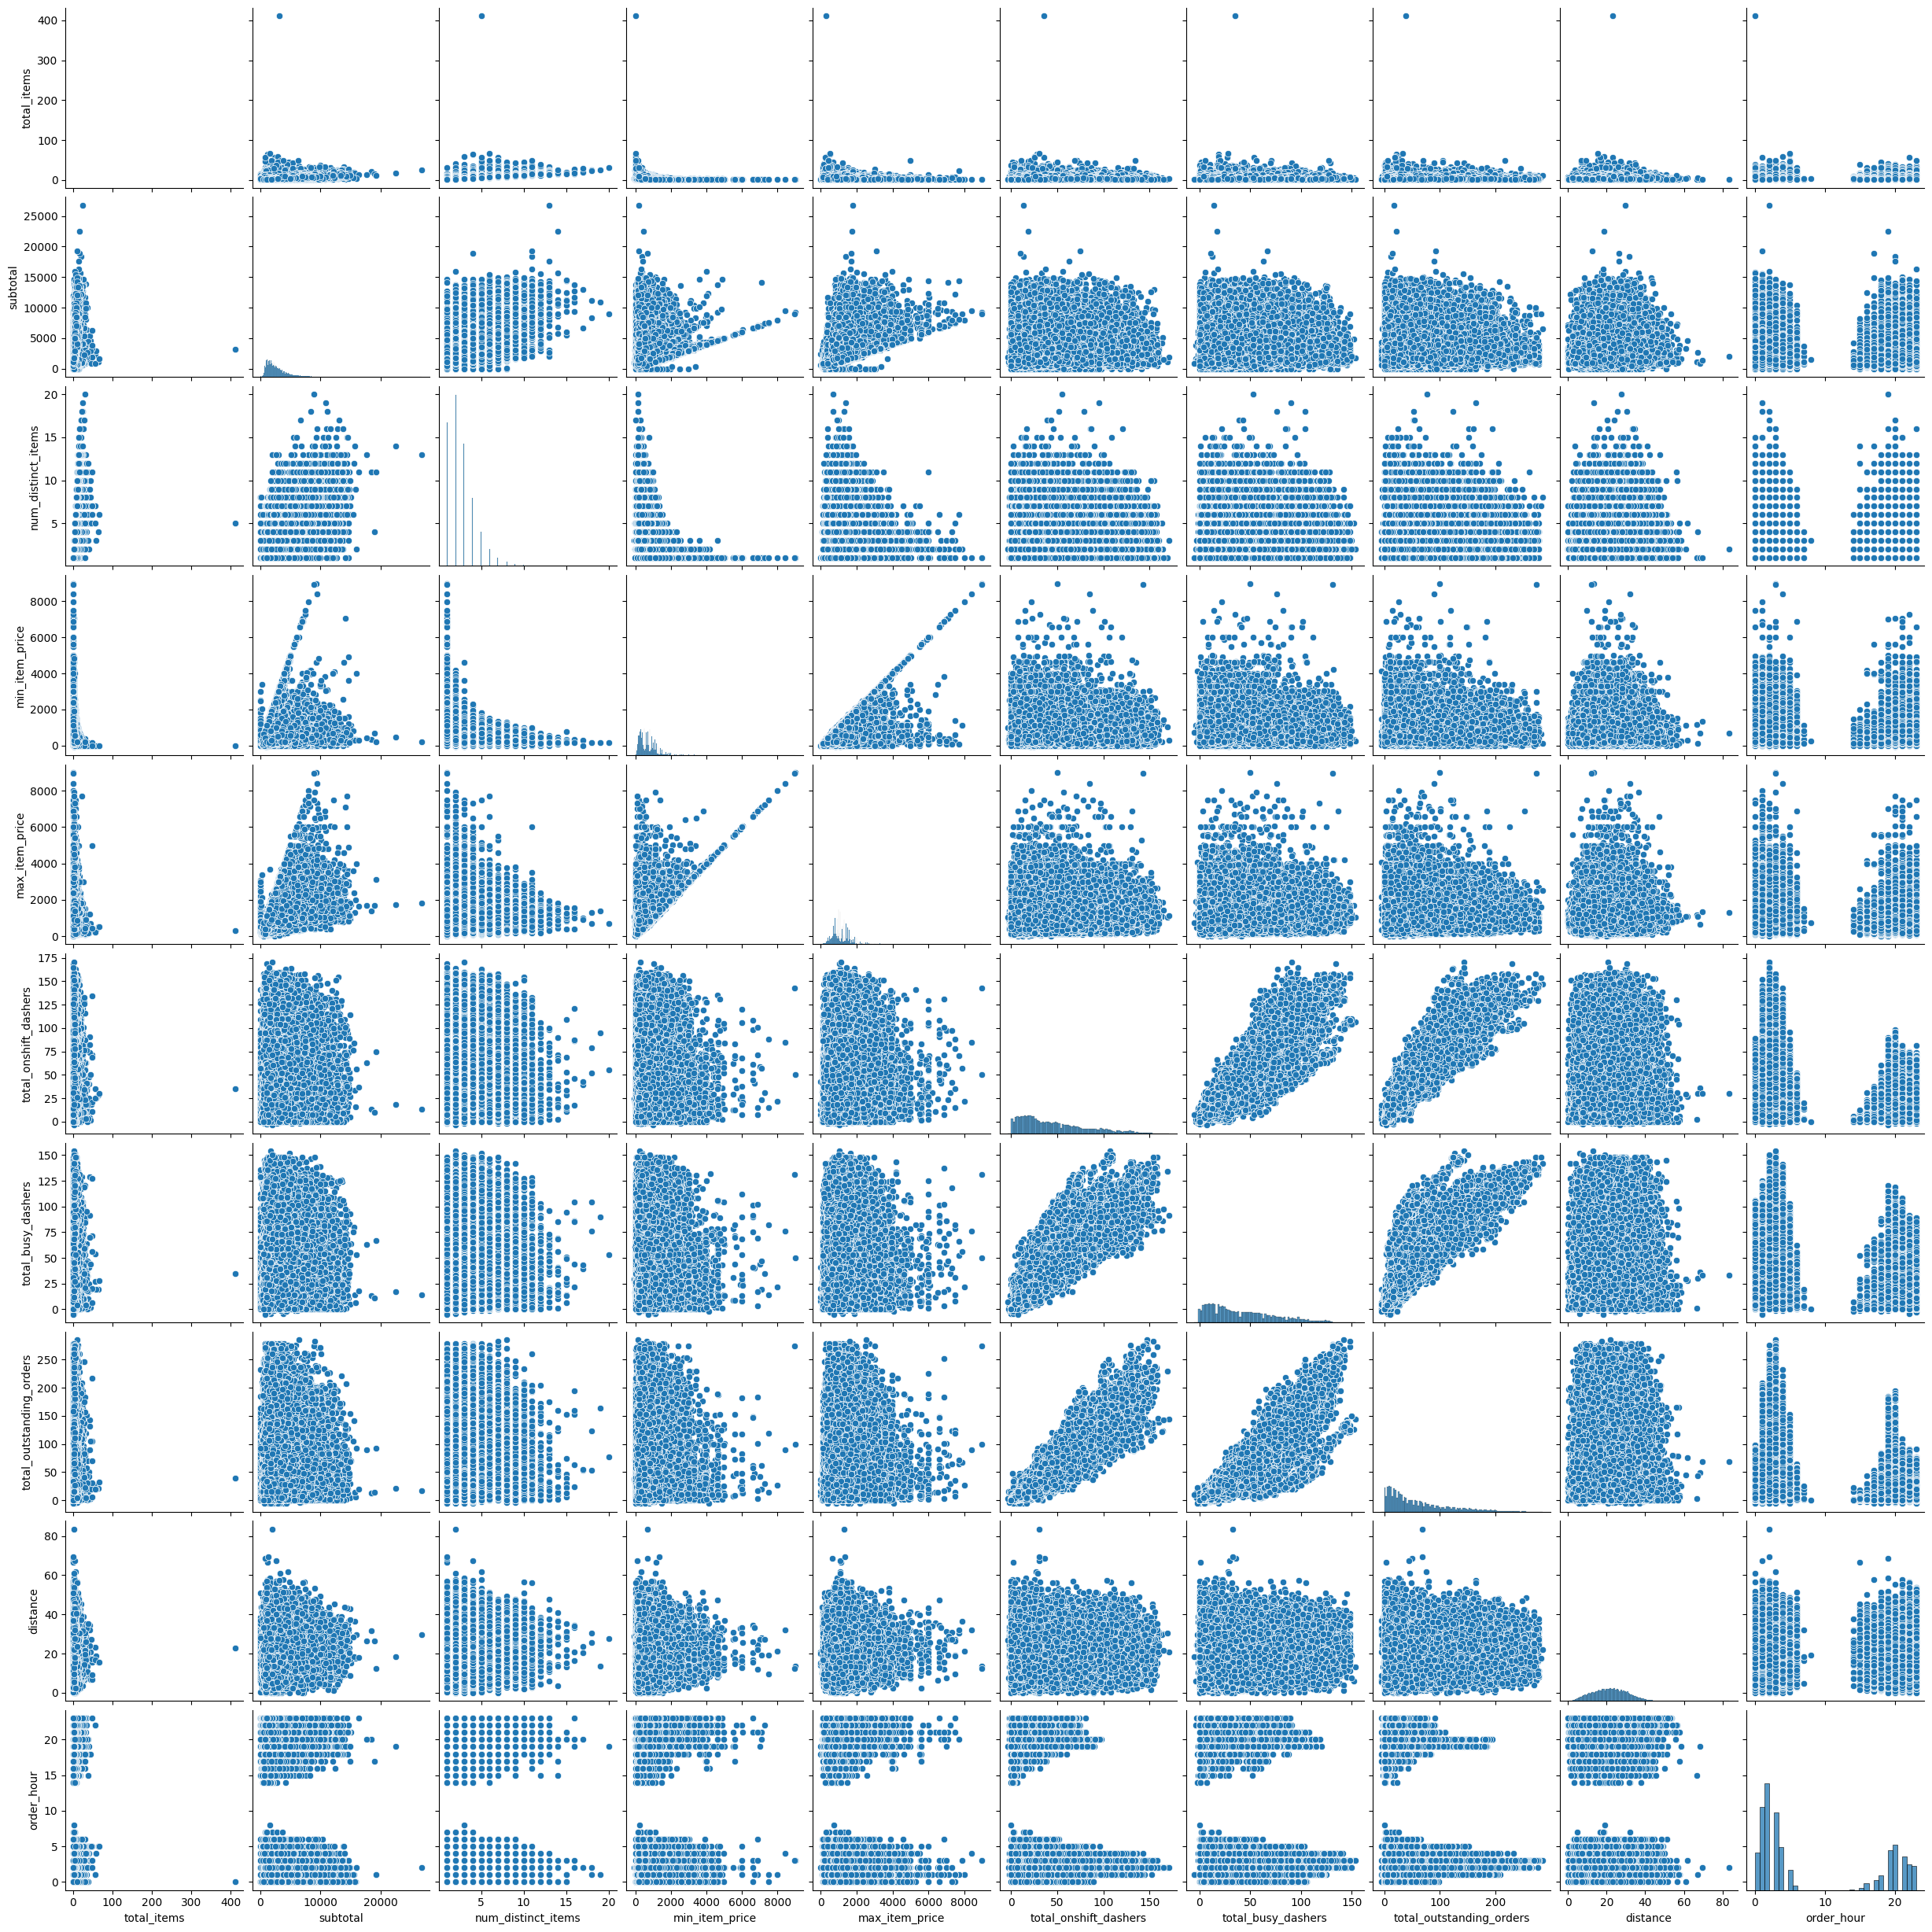

In [35]:
#pairplot
sns.pairplot(data = X_train , vars = numerical_cols)
plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

In [37]:
# Distribution of categorical columns

plt.figure(figsize=(25, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=X_train, x=col, palette="viridis", order=X_train[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()



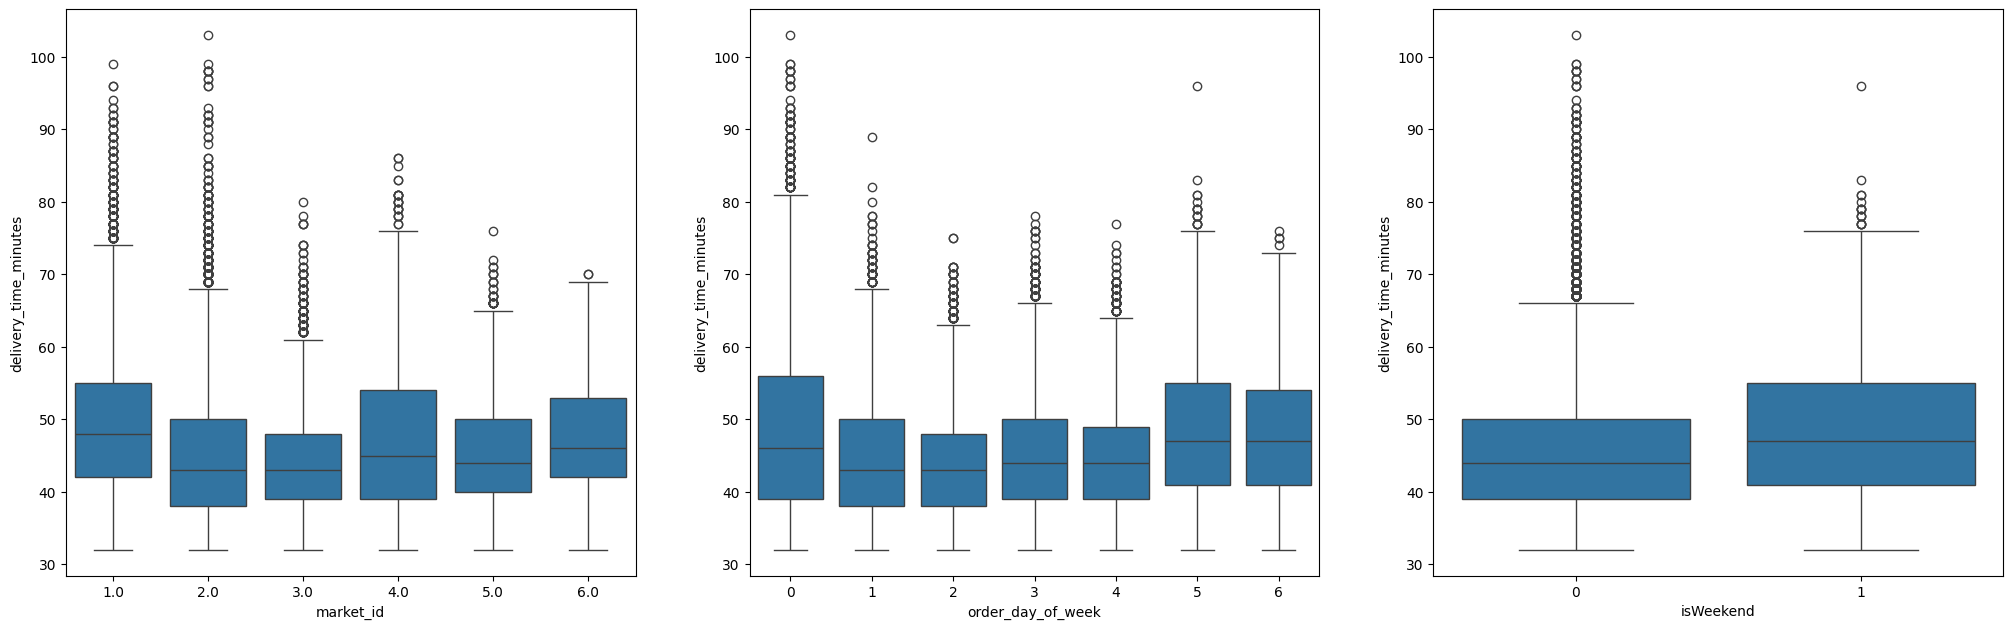

In [38]:
plt.figure(figsize=(25, 25))
for i in enumerate(categorical_cols):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=X_test, x=i[1], y=y_test
)
plt.show()

In [39]:
categorical_cols

['market_id', 'order_day_of_week', 'isWeekend']

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

In [41]:
# Distribution of time_taken

plt.figure(figsize=(8, 5))

# Histogram & KDE plot
sns.histplot(y_test, bins=30, kde=True, color="blue")

# Titles and Labels
plt.title("Distribution of Delivery Time (minutes)", fontsize=12)
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Frequency")

plt.show()


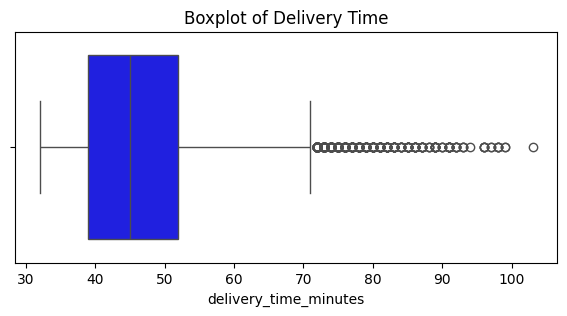

In [42]:
plt.figure(figsize=(7, 3))
sns.boxplot(x=y_test, color="blue")
plt.title("Boxplot of Delivery Time")
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

In [45]:
numerical_cols

['total_items',
 'subtotal',
 'num_distinct_items',
 'min_item_price',
 'max_item_price',
 'total_onshift_dashers',
 'total_busy_dashers',
 'total_outstanding_orders',
 'distance',
 'order_hour']

In [46]:
categorical_cols

['market_id', 'order_day_of_week', 'isWeekend']

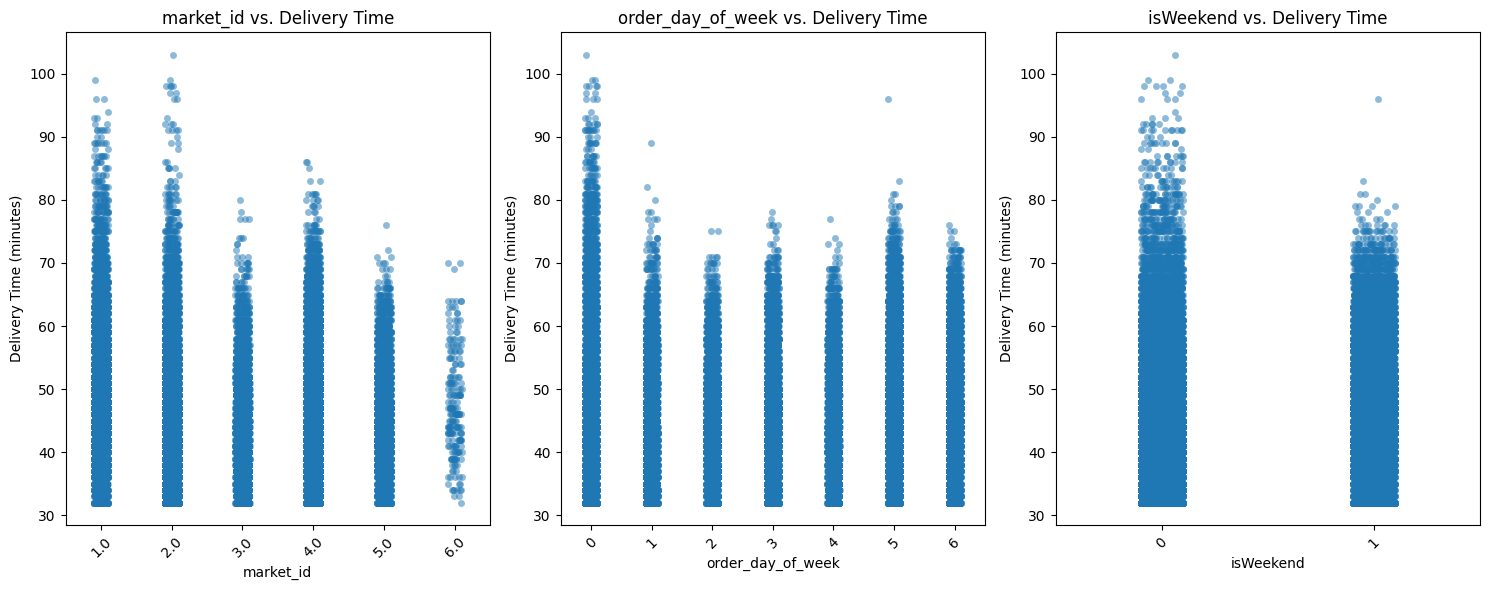

In [47]:
# Scatter plot to visualise the relationship between time_taken and other features

# Define important numerical and categorical features
#important_numerical_features = ["total_items", "subtotal", "num_distinct_items", "total_onshift_dashers", "total_busy_dashers", "distance"]
important_numerical_features = numerical_cols
important_categorical_features = categorical_cols

# Scatter plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(important_numerical_features, 1):
    plt.subplot(4, 3, i)
    sns.scatterplot(data=X_test, x=col, y=y_test, alpha=0.5)
    plt.title(f"{col} vs. Delivery Time")
    plt.xlabel(col)
    plt.ylabel("Delivery Time (minutes)")

plt.tight_layout()
plt.show()

# Scatter plots for categorical features (Jitter added for better visualization)
plt.figure(figsize=(15, 6))
for i, col in enumerate(important_categorical_features, 1):
    plt.subplot(1, 3, i)
    sns.stripplot(data=X_test, x=col, y=y_test, jitter=True, alpha=0.5)
    plt.xticks(rotation=45)
    plt.title(f"{col} vs. Delivery Time")
    plt.xlabel(col)
    plt.ylabel("Delivery Time (minutes)")

plt.tight_layout()
plt.show()



In [48]:
X_train.head()

market_id  total_items  subtotal  num_distinct_items  min_item_price  \
94465        4.0            3      4385                   3            1095   
100712       3.0            4      2772                   3              79   
153524       2.0            7      1663                   5             139   
85660        2.0            3      1477                   3             429   
100506       2.0            1      1134                   1             725   

        max_item_price  total_onshift_dashers  total_busy_dashers  \
94465             1395                   84.0                63.0   
100712            1349                   22.0                16.0   
153524             579                    2.0                 1.0   
85660              579                   41.0                42.0   
100506             725                   60.0                61.0   

        total_outstanding_orders  distance  order_hour  order_day_of_week  \
94465                      101.0     26.72           2                  6   
100712                      13.0     22.88           3                  6   
153524                       0.0     13.80           5                  1   
85660                       41.0      8.76           3                  4   
100506                      79.0     12.40          20                  3   

        isWeekend  
94465           1  
100712          1  
153524          0  
85660           0  
100506          0

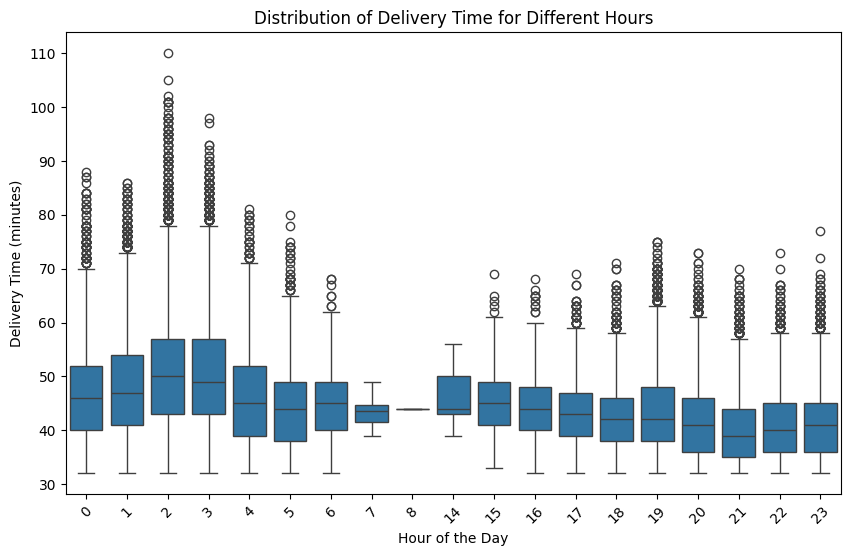

In [49]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(10, 6))
sns.boxplot(x=X_train["order_hour"], y=y_train)
plt.xlabel('Hour of the Day')
plt.ylabel('Delivery Time (minutes)')
plt.title('Distribution of Delivery Time for Different Hours')
plt.xticks(rotation=45)
plt.show()


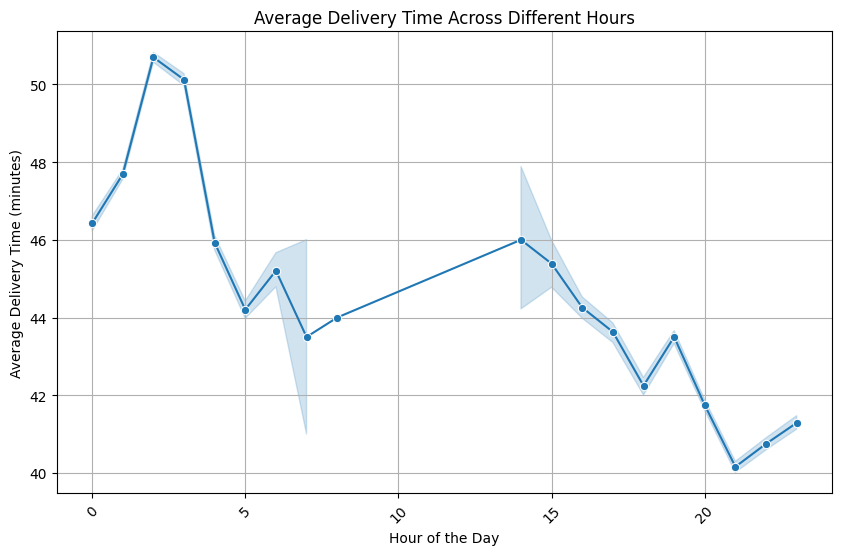

In [50]:
# check the same using line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=X_train["order_hour"], y=y_train, estimator='mean', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Delivery Time (minutes)')
plt.title('Average Delivery Time Across Different Hours')
plt.xticks(rotation=45)
plt.grid()
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

In [53]:
numerical_cols

['total_items',
 'subtotal',
 'num_distinct_items',
 'min_item_price',
 'max_item_price',
 'total_onshift_dashers',
 'total_busy_dashers',
 'total_outstanding_orders',
 'distance',
 'order_hour']

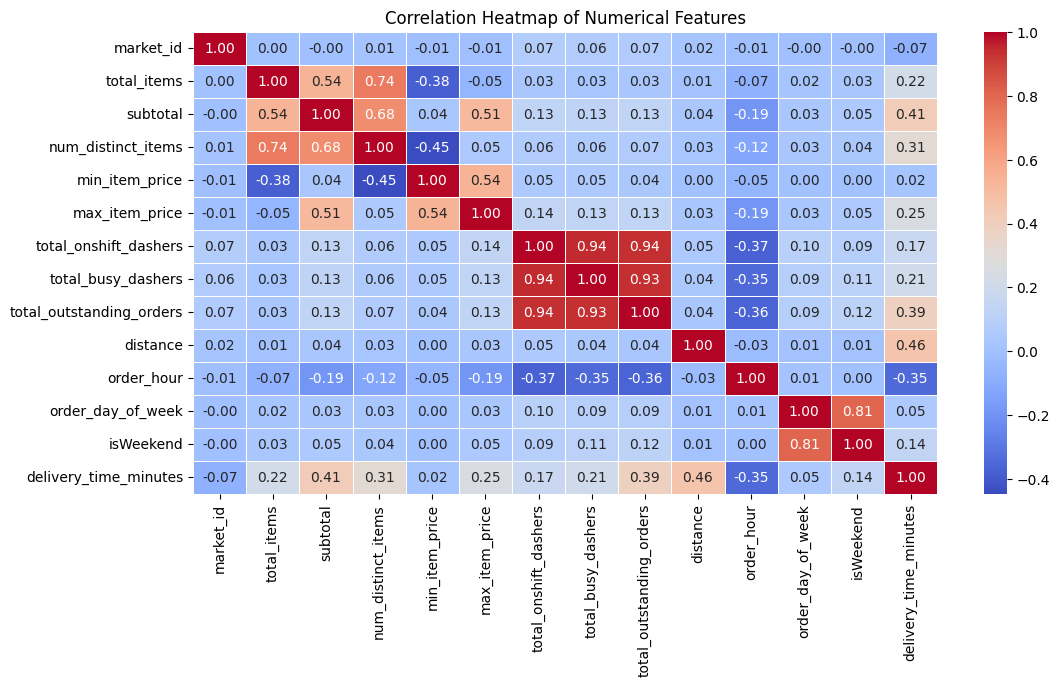

In [54]:
# Plot the heatmap of the correlation matrix

numerical_cols_with_target = X_train.copy()
numerical_cols_with_target["delivery_time_minutes"] = y_train  # Add target variable

numerical_cols_with_target = numerical_cols_with_target.corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numerical_cols_with_target, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [56]:
# first drop the highly correlated columns
#highly_correlated_cols = ['total_onshift_dashers', 'total_outstanding_orders']

#X_train = X_train.drop(columns=highly_correlated_cols)

In [57]:
correlation_with_target = X_train[numerical_cols].corrwith(y_train)
correlation_with_target = correlation_with_target.abs()
weak_features = correlation_with_target.nsmallest(2)
weak_features = list(weak_features.index)
print(weak_features)
X_train.drop(weak_features, axis=1, inplace=True)
X_test.drop(weak_features, axis=1, inplace=True)

numerical_cols = list(set(numerical_cols) - set(weak_features))

['min_item_price', 'total_onshift_dashers']


In [58]:
numerical_cols

['total_outstanding_orders',
 'order_hour',
 'distance',
 'total_busy_dashers',
 'total_items',
 'subtotal',
 'num_distinct_items',
 'max_item_price']

In [59]:
# Drop 3-5 weakly correlated columns from training dataset

# Compute correlation with the target variable
#correlation_with_target = numerical_cols_with_target.corr()['delivery_time_minutes'].abs().sort_values()
#weakly_correlated_cols = correlation_with_target[correlation_with_target < 0.1].index.tolist()

#print(weakly_correlated_cols)

# select up to 5 of the weakest columns
#cols_to_drop = weakly_correlated_cols[:5] 

# Drop up to 5 of the weakest columns from Training set
#X_train = X_train.drop(columns=cols_to_drop)
#X_train.head()

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

In [62]:
y_train.head()

94465     51.0
100712    45.0
153524    40.0
85660     32.0
100506    33.0
Name: delivery_time_minutes, dtype: float64

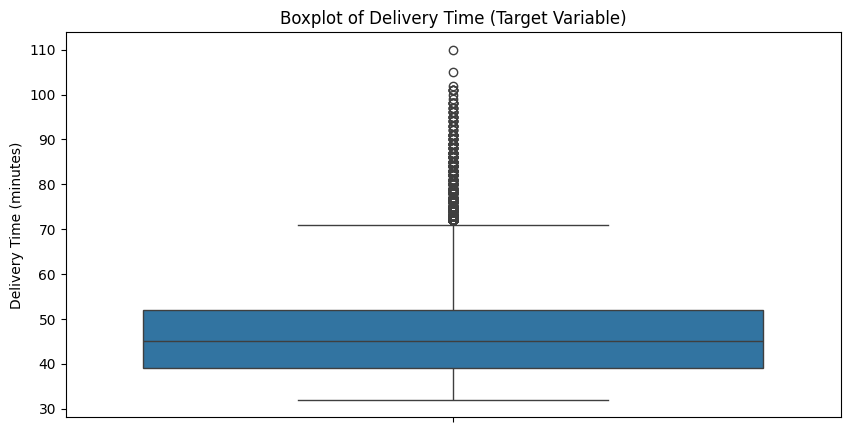

market_id  total_items  subtotal  num_distinct_items  max_item_price  \
94465        4.0            3      4385                   3            1395   
100712       3.0            4      2772                   3            1349   
153524       2.0            7      1663                   5             579   
85660        2.0            3      1477                   3             579   
100506       2.0            1      1134                   1             725   

        total_busy_dashers  total_outstanding_orders  distance  order_hour  \
94465                 63.0                     101.0     26.72           2   
100712                16.0                      13.0     22.88           3   
153524                 1.0                       0.0     13.80           5   
85660                 42.0                      41.0      8.76           3   
100506                61.0                      79.0     12.40          20   

        order_day_of_week  isWeekend  
94465                   6          1  
100712                  6          1  
153524                  1          0  
85660                   4          0  
100506                  3          0

In [63]:
# Boxplot for time_taken

# Set plot size for better visibility
plt.figure(figsize=(10, 5))

# Boxplot for target variable
sns.boxplot(y=y_train)
plt.title("Boxplot of Delivery Time (Target Variable)")
plt.ylabel("Delivery Time (minutes)")
plt.show()

# Boxplots for all numerical columns
#numerical_cols = ['total_items', 'subtotal', 'max_item_price', 'total_busy_dashers', 'distance', 'order_hour','total_onshift_dashers', 'total_outstanding_orders']

# Create subplots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)  # Create a grid of subplots
    sns.boxplot(y=X_train[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

X_train.head()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [65]:
# Handle outliers

print("Shape before outliers ", X_train.shape)

# Function to cap outliers using IQR
def cap_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap outliers
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    return df

# Apply function to handle outliers
X_train = cap_outliers(X_train, numerical_cols)
y_train  = y_train[X_train.index]

print("Shape after outliers ", X_train.shape)

Shape before outliers  (123043, 11)
Shape after outliers  (123043, 11)


In [66]:
# box plot after outlier removal
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)  # Create a grid of subplots
    sns.boxplot(y=X_train[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [68]:
X_test.head()


market_id  total_items  subtotal  num_distinct_items  max_item_price  \
50609       1.0            4      2596                   4            1099   
49181       4.0            3      3180                   2            1300   
4526        5.0            1      1199                   1            1199   
131         5.0            5      1590                   4             440   
57096       3.0            6      3680                   3             750   

       total_busy_dashers  total_outstanding_orders  distance  order_hour  \
50609                52.0                      66.0     28.32           2   
49181                98.0                     192.0     23.56           2   
4526                  6.0                       6.0     14.60           5   
131                   4.0                       4.0     25.64          22   
57096                 1.0                       1.0     16.08          19   

       order_day_of_week  isWeekend  
50609                  2          0  
49181                  0          0  
4526                   4          0  
131                    2          0  
57096                  6          1

In [69]:
# Define numerical and categorical columns for easy EDA and data manipulation
# numerical columns
print("Numerical columns ", numerical_cols)

# categorical columns
print("categorical columns ", categorical_cols)


Numerical columns  ['total_outstanding_orders', 'order_hour', 'distance', 'total_busy_dashers', 'total_items', 'subtotal', 'num_distinct_items', 'max_item_price']
categorical columns  ['market_id', 'order_day_of_week', 'isWeekend']


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [72]:
# Plot distributions for all numerical columns

plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)  # Create subplots (adjust based on number of columns)
    sns.histplot(X_test[col], kde=True, bins=30)  # Histogram with KDE curve
    plt.title(f'Distribution of {col}')
    
plt.tight_layout()  # Adjust subplot layout
plt.show()



##### **4.1.2**
Check the distribution of categorical features

In [74]:
X_test

market_id  total_items  subtotal  num_distinct_items  max_item_price  \
50609        1.0            4      2596                   4            1099   
49181        4.0            3      3180                   2            1300   
4526         5.0            1      1199                   1            1199   
131          5.0            5      1590                   4             440   
57096        3.0            6      3680                   3             750   
...          ...          ...       ...                 ...             ...   
4506         3.0            4      1300                   2             350   
73660        5.0            1      2935                   1            2328   
127883       2.0            2      2170                   2            1175   
137254       2.0            5      2410                   4             795   
139332       3.0            2      2868                   2             999   

        total_busy_dashers  total_outstanding_orders  distance  order_hour  \
50609                 52.0                      66.0     28.32           2   
49181                 98.0                     192.0     23.56           2   
4526                   6.0                       6.0     14.60           5   
131                    4.0                       4.0     25.64          22   
57096                  1.0                       1.0     16.08          19   
...                    ...                       ...       ...         ...   
4506                  38.0                      45.0     33.48           2   
73660                 21.0                      29.0     33.56           1   
127883                15.0                       4.0     12.44          16   
137254                 7.0                       8.0     27.12          16   
139332                22.0                      22.0     23.68          20   

        order_day_of_week  isWeekend  
50609                   2          0  
49181                   0          0  
4526                    4          0  
131                     2          0  
57096                   6          1  
...                   ...        ...  
4506                    1          0  
73660                   6          1  
127883                  5          1  
137254                  3          0  
139332                  4          0  

[52734 rows x 11 columns]

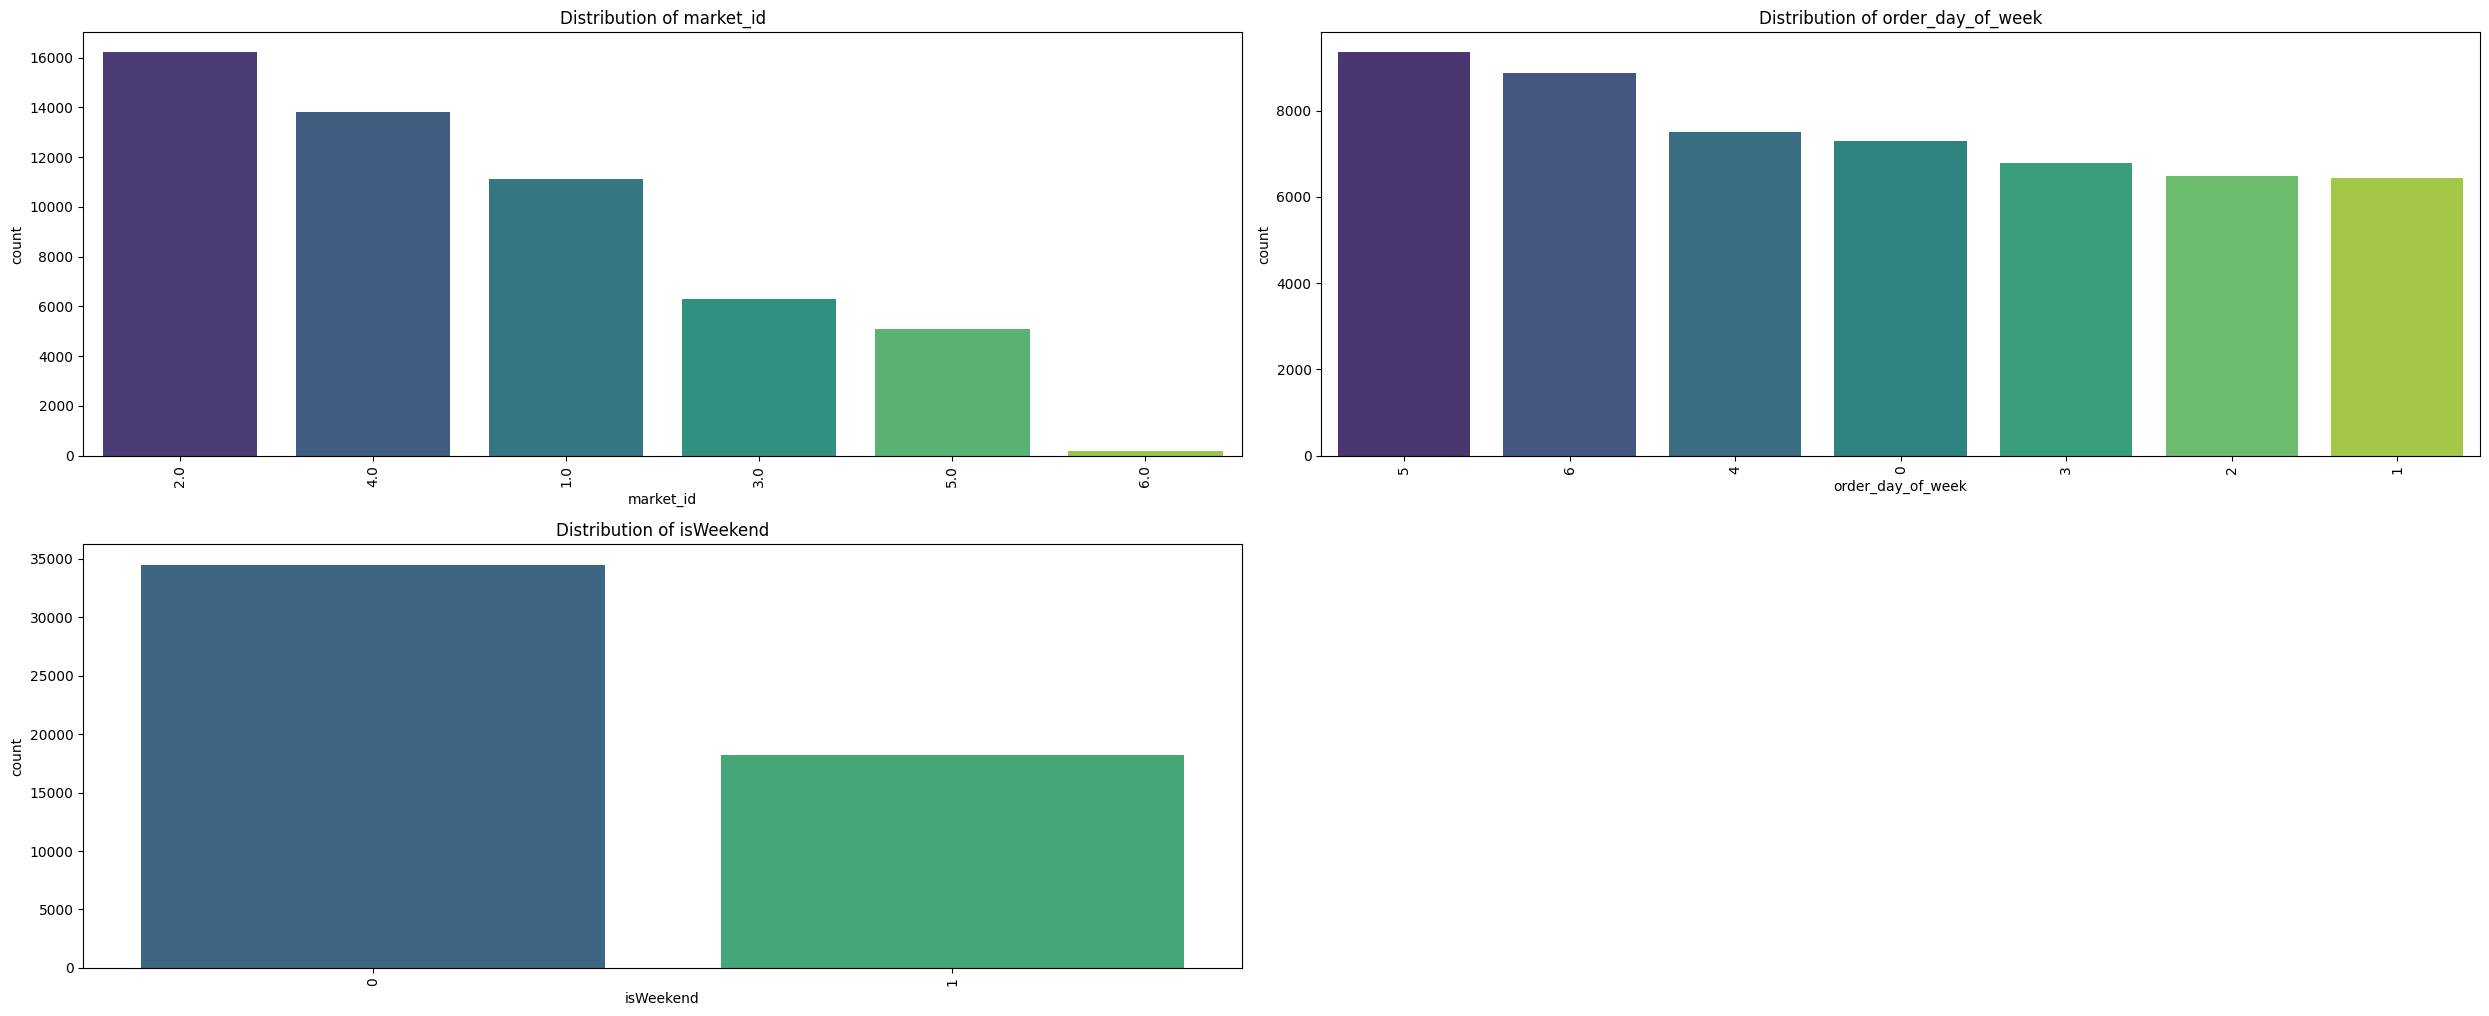

In [75]:
# Distribution of categorical columns

plt.figure(figsize=(25, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=X_test, x=col, palette="viridis", order=X_test[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

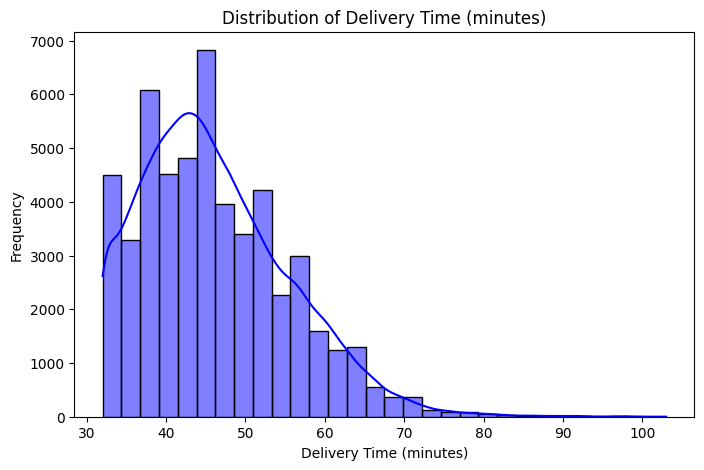

In [77]:
# Distribution of time_taken

plt.figure(figsize=(8, 5))

# Histogram & KDE plot
sns.histplot(y_test, bins=30, kde=True, color="blue")

# Titles and Labels
plt.title("Distribution of Delivery Time (minutes)", fontsize=12)
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Frequency")

plt.show()


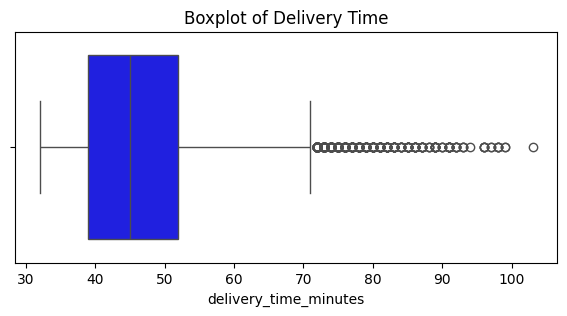

In [78]:
plt.figure(figsize=(7, 3))
sns.boxplot(x=y_test, color="blue")
plt.title("Boxplot of Delivery Time")
plt.show()


#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [80]:
X_test

market_id  total_items  subtotal  num_distinct_items  max_item_price  \
50609        1.0            4      2596                   4            1099   
49181        4.0            3      3180                   2            1300   
4526         5.0            1      1199                   1            1199   
131          5.0            5      1590                   4             440   
57096        3.0            6      3680                   3             750   
...          ...          ...       ...                 ...             ...   
4506         3.0            4      1300                   2             350   
73660        5.0            1      2935                   1            2328   
127883       2.0            2      2170                   2            1175   
137254       2.0            5      2410                   4             795   
139332       3.0            2      2868                   2             999   

        total_busy_dashers  total_outstanding_orders  distance  order_hour  \
50609                 52.0                      66.0     28.32           2   
49181                 98.0                     192.0     23.56           2   
4526                   6.0                       6.0     14.60           5   
131                    4.0                       4.0     25.64          22   
57096                  1.0                       1.0     16.08          19   
...                    ...                       ...       ...         ...   
4506                  38.0                      45.0     33.48           2   
73660                 21.0                      29.0     33.56           1   
127883                15.0                       4.0     12.44          16   
137254                 7.0                       8.0     27.12          16   
139332                22.0                      22.0     23.68          20   

        order_day_of_week  isWeekend  
50609                   2          0  
49181                   0          0  
4526                    4          0  
131                     2          0  
57096                   6          1  
...                   ...        ...  
4506                    1          0  
73660                   6          1  
127883                  5          1  
137254                  3          0  
139332                  4          0  

[52734 rows x 11 columns]

In [81]:
important_numerical_features

['total_items',
 'subtotal',
 'num_distinct_items',
 'min_item_price',
 'max_item_price',
 'total_onshift_dashers',
 'total_busy_dashers',
 'total_outstanding_orders',
 'distance',
 'order_hour']

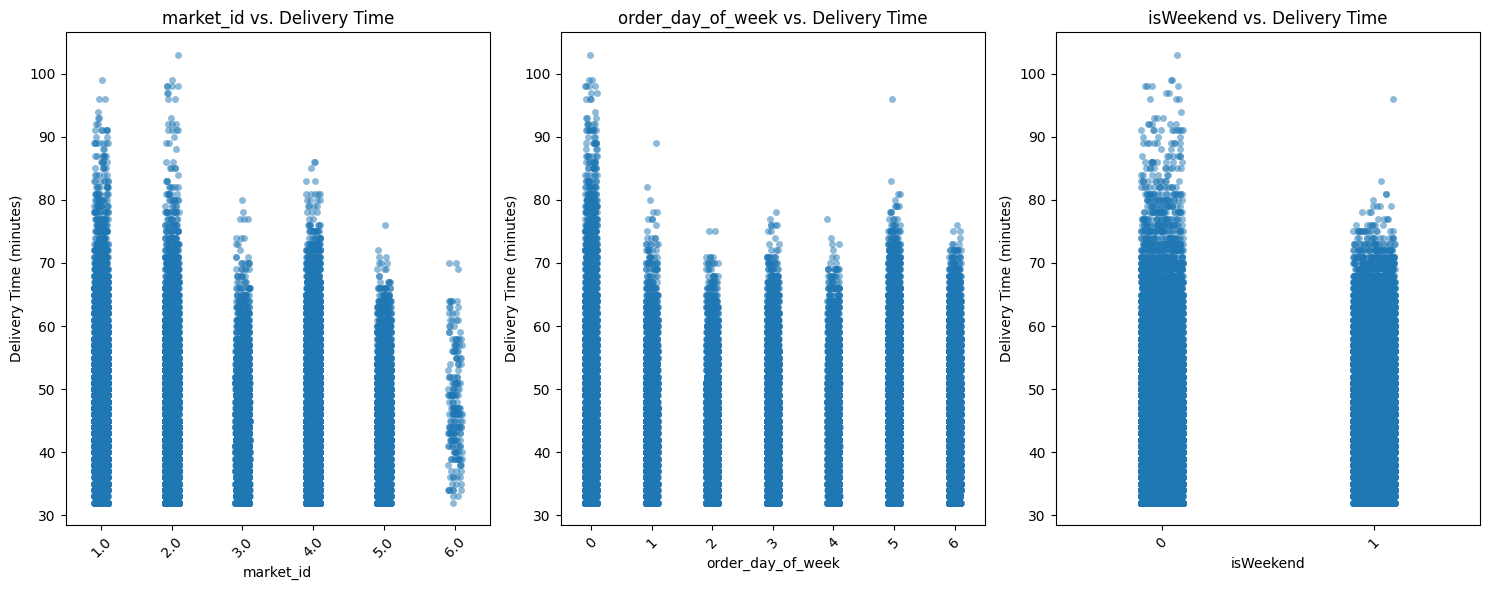

In [82]:
# Scatter plot to visualise the relationship between time_taken and other features

# Define important numerical and categorical features

important_numerical_features = numerical_cols
important_categorical_features = categorical_cols

# Scatter plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(important_numerical_features, 1):
    plt.subplot(4, 3, i)
    sns.scatterplot(data=X_test, x=col, y=y_test, alpha=0.5)
    plt.title(f"{col} vs. Delivery Time")
    plt.xlabel(col)
    plt.ylabel("Delivery Time (minutes)")

plt.tight_layout()
plt.show()

# Scatter plots for categorical features (Jitter added for better visualization)
plt.figure(figsize=(15, 6))
for i, col in enumerate(important_categorical_features, 1):
    plt.subplot(1, 3, i)
    sns.stripplot(data=X_test, x=col, y=y_test, jitter=True, alpha=0.5)
    plt.xticks(rotation=45)
    plt.title(f"{col} vs. Delivery Time")
    plt.xlabel(col)
    plt.ylabel("Delivery Time (minutes)")

plt.tight_layout()
plt.show()



#### **4.3** Drop the columns with weak correlations with the target variable

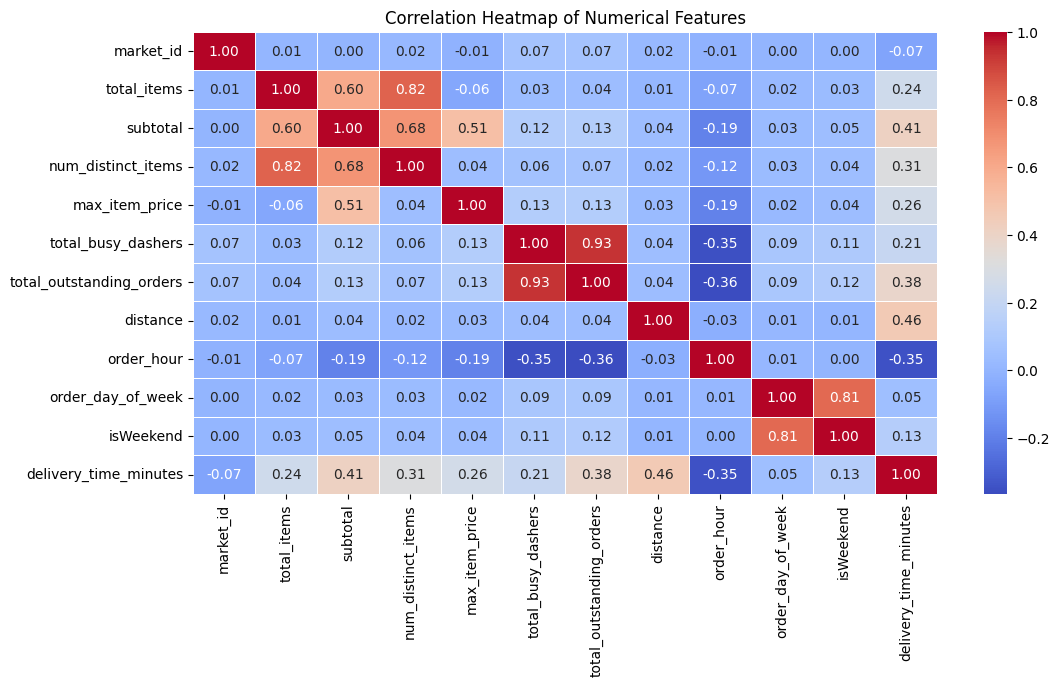

In [84]:
# Plot the heatmap of the correlation matrix

numerical_cols_with_target_test = X_test.copy()
numerical_cols_with_target_test["delivery_time_minutes"] = y_test  # Add target variable

numerical_cols_with_target_test = numerical_cols_with_target_test.corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numerical_cols_with_target_test, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [85]:
# Drop the weakly correlated columns from TESTING dataset
# first drop the highly correlated columns
#highly_correlated_cols = ['total_onshift_dashers', 'total_outstanding_orders']

#X_test = X_test.drop(columns=highly_correlated_cols)


In [86]:
# Drop 3-5 weakly correlated columns from TESTING dataset

# Drop the same columns we calculated on Training dataset
print(weak_features)

# Drop up to 5 of the weakest columns from Testing set
X_test.head()

['min_item_price', 'total_onshift_dashers']


market_id  total_items  subtotal  num_distinct_items  max_item_price  \
50609       1.0            4      2596                   4            1099   
49181       4.0            3      3180                   2            1300   
4526        5.0            1      1199                   1            1199   
131         5.0            5      1590                   4             440   
57096       3.0            6      3680                   3             750   

       total_busy_dashers  total_outstanding_orders  distance  order_hour  \
50609                52.0                      66.0     28.32           2   
49181                98.0                     192.0     23.56           2   
4526                  6.0                       6.0     14.60           5   
131                   4.0                       4.0     25.64          22   
57096                 1.0                       1.0     16.08          19   

       order_day_of_week  isWeekend  
50609                  2          0  
49181                  0          0  
4526                   4          0  
131                    2          0  
57096                  6          1

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [89]:
# Import libraries

# import MinMaxScaler as data is right skewed
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import RFE

import statsmodels.api as sm


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [91]:
numerical_cols_final = numerical_cols

In [92]:
categorical_cols_final = categorical_cols
categorical_cols_final

['market_id', 'order_day_of_week', 'isWeekend']

In [93]:
X_train.head()

market_id  total_items  subtotal  num_distinct_items  max_item_price  \
94465        4.0          3.0    4385.0                 3.0          1395.0   
100712       3.0          4.0    2772.0                 3.0          1349.0   
153524       2.0          7.0    1663.0                 5.0           579.0   
85660        2.0          3.0    1477.0                 3.0           579.0   
100506       2.0          1.0    1134.0                 1.0           725.0   

        total_busy_dashers  total_outstanding_orders  distance  order_hour  \
94465                 63.0                     101.0     26.72         2.0   
100712                16.0                      13.0     22.88         3.0   
153524                 1.0                       0.0     13.80         5.0   
85660                 42.0                      41.0      8.76         3.0   
100506                61.0                      79.0     12.40        20.0   

        order_day_of_week  isWeekend  
94465                   6          1  
100712                  6          1  
153524                  1          0  
85660                   4          0  
100506                  3          0

In [94]:
# Do one hot encoding of the categorical columns
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')

# encoding the categorical variables
categorical_encoded_train = encoder.fit_transform(X_train[categorical_cols_final])
categorical_encoded_test = encoder.transform(X_test[categorical_cols_final])

# Convert to Dataframe
categorical_encoded_train = pd.DataFrame(categorical_encoded_train, columns=encoder.get_feature_names_out(categorical_cols_final))
categorical_encoded_test = pd.DataFrame(categorical_encoded_test, columns=encoder.get_feature_names_out(categorical_cols_final))

categorical_encoded_train.index = X_train.index
categorical_encoded_test.index = X_test.index

X_train = pd.concat([X_train.drop(columns=categorical_cols_final, axis=1), categorical_encoded_train], axis=1)
X_test  = pd.concat([X_test.drop(columns=categorical_cols_final, axis=1), categorical_encoded_test], axis=1)

In [95]:
X_train.head()


total_items  subtotal  num_distinct_items  max_item_price  \
94465           3.0    4385.0                 3.0          1395.0   
100712          4.0    2772.0                 3.0          1349.0   
153524          7.0    1663.0                 5.0           579.0   
85660           3.0    1477.0                 3.0           579.0   
100506          1.0    1134.0                 1.0           725.0   

        total_busy_dashers  total_outstanding_orders  distance  order_hour  \
94465                 63.0                     101.0     26.72         2.0   
100712                16.0                      13.0     22.88         3.0   
153524                 1.0                       0.0     13.80         5.0   
85660                 42.0                      41.0      8.76         3.0   
100506                61.0                      79.0     12.40        20.0   

        market_id_2.0  market_id_3.0  market_id_4.0  market_id_5.0  \
94465             0.0            0.0            1.0            0.0   
100712            0.0            1.0            0.0            0.0   
153524            1.0            0.0            0.0            0.0   
85660             1.0            0.0            0.0            0.0   
100506            1.0            0.0            0.0            0.0   

        market_id_6.0  order_day_of_week_1  order_day_of_week_2  \
94465             0.0                  0.0                  0.0   
100712            0.0                  0.0                  0.0   
153524            0.0                  1.0                  0.0   
85660             0.0                  0.0                  0.0   
100506            0.0                  0.0                  0.0   

        order_day_of_week_3  order_day_of_week_4  order_day_of_week_5  \
94465                   0.0                  0.0                  0.0   
100712                  0.0                  0.0                  0.0   
153524                  0.0                  0.0                  0.0   
85660                   0.0                  1.0                  0.0   
100506                  1.0                  0.0                  0.0   

        order_day_of_week_6  isWeekend_1  
94465                   1.0          1.0  
100712                  1.0          1.0  
153524                  0.0          0.0  
85660                   0.0          0.0  
100506                  0.0          0.0

In [96]:
# Apply scaling to the numerical columns
scaler = MinMaxScaler()

X_train_original = X_train.copy()

# Fit on training data & transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use the same scaler

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Display the transformed datasets
print(X_train.head())
print(X_test.head())


        total_items  subtotal  num_distinct_items  max_item_price  \
94465      0.333333  0.683607                 0.4        0.609436   
100712     0.500000  0.432146                 0.4        0.589340   
153524     1.000000  0.259256                 0.8        0.252949   
85660      0.333333  0.230260                 0.4        0.252949   
100506     0.000000  0.176787                 0.0        0.316732   

        total_busy_dashers  total_outstanding_orders  distance  order_hour  \
94465             0.485714                  0.554404  0.566582    0.086957   
100712            0.150000                  0.098446  0.485157    0.130435   
153524            0.042857                  0.031088  0.292621    0.217391   
85660             0.335714                  0.243523  0.185751    0.130435   
100506            0.471429                  0.440415  0.262935    0.869565   

        market_id_2.0  market_id_3.0  market_id_4.0  market_id_5.0  \
94465             0.0            0.0          

In [97]:
print(len(X_train.columns))
scaler.scale_

20


array([1.66666667e-01, 1.55896796e-04, 2.00000000e-01, 4.36871997e-04,
       7.14285714e-03, 5.18134715e-03, 2.12044105e-02, 4.34782609e-02,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [101]:
# Create/Initialise the model

# Initialize the model
lr_model = LinearRegression()

In [102]:
# Train the model using the training data

def model_results(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_test_pred)
    
    mae = mean_absolute_error(y_test, y_test_pred)
    
    rmse = np.sqrt(mse)
    
    r2 = r2_score(y_test, y_test_pred)
    
    # Compute Adjusted R²
    n = X_test.shape[0]  # Number of observations
    p = X_test.shape[1]  # Number of predictors
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    
    print('The mean squared error (MSE) of the fitteed model is :', mse)
    print('The mean Absolute error (MAE) of the fitteed model is :', mae)
    print('The Root Mean Squared Error (RMSE) of the fitteed model is :', rmse)

    print('The R2 value of the fitted model is :', r2)
    print("Adjusted R2 value of the fitted model is: ", adjusted_r2)
    return model

In [103]:
# Make predictions and 
# Find results for evaluation metrics

model = model_results(lr_model, X_train, y_train, X_test, y_test)

The mean squared error (MSE) of the fitteed model is : 19.86706810209746
The mean Absolute error (MAE) of the fitteed model is : 3.328402369410683
The Root Mean Squared Error (RMSE) of the fitteed model is : 4.4572489387622785
The R2 value of the fitted model is : 0.77254368386657
Adjusted R2 value of the fitted model is:  0.7724573839723756


In [104]:
# Create/Initialise the model using statsmodels

X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

model1 = sm.OLS(y_train, X_train_sm).fit()
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     delivery_time_minutes   R-squared:                       0.755
Model:                               OLS   Adj. R-squared:                  0.755
Method:                    Least Squares   F-statistic:                 1.995e+04
Date:                   Sun, 30 Mar 2025   Prob (F-statistic):               0.00
Time:                           22:55:43   Log-Likelihood:            -3.6272e+05
No. Observations:                 123043   AIC:                         7.255e+05
Df Residuals:                     123023   BIC:                         7.257e+05
Df Model:                             19                                         
Covariance Type:               nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       37.2417      0.072    518.298      0.000      37.101      37.383
total_items                 -0.1203      0.120     -1.001      0.317      -0.356       0.115
subtotal                     9.1212      0.118     77.273      0.000       8.890       9.353
num_distinct_items           2.6824      0.108     24.782      0.000       2.470       2.895
max_item_price               1.5322      0.104     14.777      0.000       1.329       1.735
total_busy_dashers         -45.3200      0.168   -269.525      0.000     -45.650     -44.990
total_outstanding_orders    49.2598      0.144    342.138      0.000      48.978      49.542
distance                    22.8854      0.071    320.422      0.000      22.745      23.025
order_hour                  -3.5788      0.039    -90.681      0.000      -3.656      -3.501
market_id_2.0               -6.7589      0.042   -161.075      0.000      -6.841      -6.677
market_id_3.0               -4.4517      0.048    -93.358      0.000      -4.545      -4.358
market_id_4.0               -5.3797      0.043   -125.715      0.000      -5.464      -5.296
market_id_5.0               -4.3194      0.051    -84.978      0.000      -4.419      -4.220
market_id_6.0               -3.8329      0.224    -17.122      0.000      -4.272      -3.394
order_day_of_week_1         -2.8187      0.052    -54.404      0.000      -2.920      -2.717
order_day_of_week_2         -4.1296      0.052    -79.973      0.000      -4.231      -4.028
order_day_of_week_3         -3.4463      0.051    -67.457      0.000      -3.546      -3.346
order_day_of_week_4         -3.9331      0.050    -79.022      0.000      -4.031      -3.836
order_day_of_week_5         -0.6746      0.026    -25.509      0.000      -0.726      -0.623
order_day_of_week_6         -0.0328      0.027     -1.235      0.217      -0.085       0.019
isWeekend_1                 -0.7074      0.028    -25.235      0.000      -0.762      -0.652
==============================================================================
Omnibus:                     7213.415   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27131.912
Skew:                           0.184   Prob(JB):                         0.00
Kurtosis:                       5.271   Cond. No.                     2.47e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.5e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [108]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Step 1: Create a Linear Regression Model
lr = LinearRegression()

# Step 2: Iterate over different numbers of features
max_features = len(X_train.columns)
best_r2 = -float("inf")  # To track the best R² value
best_num_features = 0
best_model = None
best_selected_features = []

for num_features in range(1, max_features + 1):
    rfe = RFE(lr, n_features_to_select=num_features)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    
    # Get selected feature names
    selected_features = X_train.columns[rfe.support_].tolist()
    
    # Convert back to DataFrame and add constant
    X_train_rfe_df = pd.DataFrame(X_train_rfe, columns=selected_features, index=X_train.index)
    X_train_sm = sm.add_constant(X_train_rfe_df)
    
    # Fit the model
    model = sm.OLS(y_train, X_train_sm).fit()
    
    # Track best model
    if model.rsquared_adj > best_r2:
        best_r2 = model.rsquared_adj
        best_num_features = num_features
        best_model = model
        best_selected_features = selected_features

    print(f"Num Features: {num_features}, Adjusted R²: {model.rsquared_adj:.4f}")

# Step 3: Print the best model summary
print(f"\nBest Model Selected with {best_num_features} Features")
print("Selected Features:", best_selected_features)
print(best_model.summary())


Num Features: 1, Adjusted R²: 0.0190
Num Features: 2, Adjusted R²: 0.0202
Num Features: 3, Adjusted R²: 0.0202
Num Features: 4, Adjusted R²: 0.1512
Num Features: 5, Adjusted R²: 0.3250
Num Features: 6, Adjusted R²: 0.5292
Num Features: 7, Adjusted R²: 0.6482
Num Features: 8, Adjusted R²: 0.6716
Num Features: 9, Adjusted R²: 0.6950
Num Features: 10, Adjusted R²: 0.7034
Num Features: 11, Adjusted R²: 0.7167
Num Features: 12, Adjusted R²: 0.7174
Num Features: 13, Adjusted R²: 0.7345
Num Features: 14, Adjusted R²: 0.7375
Num Features: 15, Adjusted R²: 0.7418
Num Features: 16, Adjusted R²: 0.7462
Num Features: 17, Adjusted R²: 0.7523
Num Features: 18, Adjusted R²: 0.7543
Num Features: 19, Adjusted R²: 0.7549
Num Features: 20, Adjusted R²: 0.7549

Best Model Selected with 20 Features
Selected Features: ['total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_hour', 'market_id_2.0', 'market_id_3.0', 'market_id_4.0

In [109]:
# Build the final model with selected number of features


# Select only the best features chosen by RFE
final_features = best_selected_features

# Subset the data
X_train_final = X_train[final_features]
X_test_final = X_test[final_features]

# Add constant (intercept term)
X_train_final_sm = sm.add_constant(X_train_final)
X_test_final_sm = sm.add_constant(X_test_final)

# Train the final model
final_model = sm.OLS(y_train, X_train_final_sm).fit()

# Print the summary
print(final_model.summary())

# Predict on test set
y_pred = final_model.predict(X_test_final_sm)

# Evaluate R² on test set

r2_test = r2_score(y_test, y_pred)
print("R² Score on Test Data:", r2_test)



                              OLS Regression Results                             
Dep. Variable:     delivery_time_minutes   R-squared:                       0.755
Model:                               OLS   Adj. R-squared:                  0.755
Method:                    Least Squares   F-statistic:                 1.995e+04
Date:                   Sun, 30 Mar 2025   Prob (F-statistic):               0.00
Time:                           22:55:50   Log-Likelihood:            -3.6272e+05
No. Observations:                 123043   AIC:                         7.255e+05
Df Residuals:                     123023   BIC:                         7.257e+05
Df Model:                             19                                         
Covariance Type:               nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

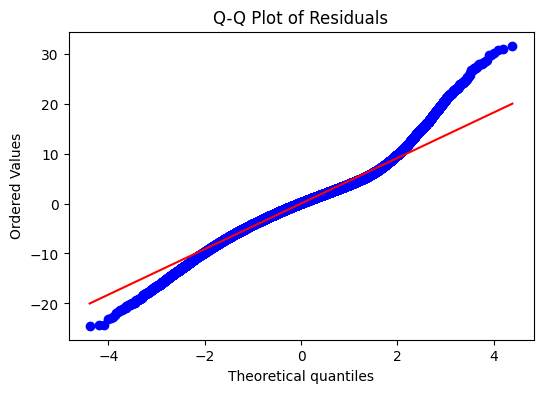

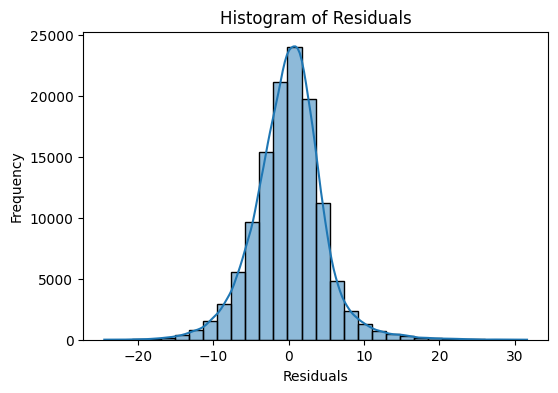

In [112]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram


# Calculate residuals
residuals = y_train - final_model.predict(X_train_final_sm)

# ---Residuals vs Predicted Values ---
plt.figure(figsize=(6, 4))
sns.scatterplot(x=final_model.predict(X_train_final_sm), y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

# --- Q-Q Plot ---
plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

# --- Histogram of Residuals ---
plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()


[Your inferences here:]

The residuals are not normally distributed (somewhat right skewed), so there is a scope of further model improvement.

#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [137]:
# Get scaled coefficients (excluding intercept)
scaled_coefficients = final_model.params[1:]  

# Create DataFrame
coef_df = pd.DataFrame({"Feature": X_train.columns, "ScaledCoefficient": scaled_coefficients.values})

# Compute unscaled coefficients
feature_min = X_train_original.min()
feature_max = X_train_original.max()

unscaled_coefficients = scaled_coefficients * (feature_max - feature_min)

# Add to DataFrame
coef_df["UnscaledCoefficient"] = unscaled_coefficients.values  

# Display
print(coef_df)


                     Feature  ScaledCoefficient  UnscaledCoefficient
0                total_items          -0.120263            -0.721577
1                   subtotal           9.121177         58507.789236
2         num_distinct_items           2.682366            13.411829
3             max_item_price           1.532174          3507.146088
4         total_busy_dashers         -45.320007         -6344.800914
5   total_outstanding_orders          49.259833          9507.147675
6                   distance          22.885440          1079.277350
7                 order_hour          -3.578759           -82.311460
8              market_id_2.0          -6.758939            -6.758939
9              market_id_3.0          -4.451670            -4.451670
10             market_id_4.0          -5.379694            -5.379694
11             market_id_5.0          -4.319362            -4.319362
12             market_id_6.0          -3.832884            -3.832884
13       order_day_of_week_1      

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'

print(f"A unit increase in 'total_items' increases delivery time by approximately {coef_df["UnscaledCoefficient"]['total_items']:.2f} minutes.")

Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>

> The categorical columns that we have day of week, market_id and is_weekend. Most of the coefficients are negative showing the negative relationship with the target variable time_taken.

---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>

> It means that 20 percent of the data is used for testing purpose , as to see how the model is performing on the unseen data.

---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> Distance has the highest correlation with the time taken variable



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

> Box plot was drawn for every feature and therefore outliers were detected. The outliers were removed with the help of inter quartile range method. The lower and upper bound was adjusted as per the permissible loss of data because of outlier removal



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>The three features most significantly impacing the delivery time are distance, subtotal and total outstanding orders



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>


– Linear Regression is a supervised fundamental algorithm that enables to establish a
linear relationship between one output variable (may be called as dependant variable ) and
single/ multiple input variables ( may be called as Independent variables )
1. Concept: It fits a line (or hyperplane) to data to predict the dependent variable based on
independent variables.
2. Mathematics:
 - Simple Linear Regression: 𝑌 = 𝛽0 + 𝛽1𝑋 + 𝜖
 - Multiple Linear Regression: 𝑌 = 𝛽0 + 𝛽1𝑋1 + 𝛽2𝑋2 + ⋯ + 𝛽𝑝𝑋𝑝 + 𝜖
3. Objective: Find coefficients that minimize the difference between predicted and actual
values using the Mean Squared Error (MSE).
4. Optimization: Coefficients are estimated using Ordinary Least Squares (OLS) or Gradient
Descent.
5. Assumptions: Linearity, independence, homoscedasticity, and normality of errors.
6. Evaluation: Metrics include R-squared, Adjusted R-squared, Mean Absolute Error (MAE),
and Root Mean Squared Error (RMSE).
7. Applications: Used for predicting outcomes, understanding relationships, and feature
selection.

##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
Both simple and multiple linear regression are used to model relationships between variables, but they differ in how many independent variables (features) are used to predict the target variable.

A model that establishes a relationship between one independent variable (
𝑋
X) and a dependent variable (
𝑌
Y) using a straight-line equation:

𝑌
=
𝛽
0
+
𝛽
1
𝑋
+
𝜖
Y=β 
0
​
 +β 
1
​
 X+ϵ
𝑌
Y = Target variable (dependent variable)

𝑋
X = Feature (independent variable)

𝛽
0
β 
0
​
  = Intercept (where the line crosses the Y-axis)

𝛽
1
β 
1
​
  = Coefficient (slope) that shows the impact of 
𝑋
X on 
𝑌
Y

𝜖
ϵ = Error term

Predicting house price based on just square footage:

House Price
=
𝛽
0
+
𝛽
1
(
Square Footage
)
+
𝜖
House Price=β 
0
​
 +β 
1
​
 (Square Footage)+ϵ
Visualization: A straight-line plot showing the relationship between one feature and the target.

=======================================================

Multiple liner regression


A model that uses two or more independent variables (
𝑋
1
,
𝑋
2
,
.
.
.
,
𝑋
𝑛
X 
1
​
 ,X 
2
​
 ,...,X 
n
​
 ) to predict the dependent variable:

𝑌
=
𝛽
0
+
𝛽
1
𝑋
1
+
𝛽
2
𝑋
2
+
.
.
.
+
𝛽
𝑛
𝑋
𝑛
+
𝜖
Y=β 
0
​
 +β 
1
​
 X 
1
​
 +β 
2
​
 X 
2
​
 +...+β 
n
​
 X 
n
​
 +ϵ
Each 
𝛽
𝑛
β 
n
​
  represents the impact of a different feature.

Example:
Predicting house price using multiple factors:

House Price
=
𝛽
0
+
𝛽
1
(
Square Footage
)
+
𝛽
2
(
Number of Bedrooms
)
+
𝛽
3
(
Location
)
+
𝜖
House Price=β 
0
​
 +β 
1
​
 (Square Footage)+β 
2
​
 (Number of Bedrooms)+β 
3
​
 (Location)+ϵ
Here, each variable contributes to predicting house price.

Visualization:
Since there are multiple variables, visualization is harder (no single 2D line), but we can use 3D plots or heatmaps to understand relationships.



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
The cost function in linear regression measures how far the predicted values are from the actual values. The most common cost function is Mean Squared Error (MSE), which calculates the average squared difference between actual and predicted values.

To minimize this error and find the best-fit line, we use:
1. Normal Equation (analytical method) for small datasets.
2. Gradient Descent (iterative optimization) for large datasets, where model parameters are updated step-by-step to reduce the error.





---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.


**Answer:**

Overfitting: Model learns noise & patterns too well : High training accuracy, poor test accuracy (Too complex).
Underfitting: Model is too simple, fails to learn patterns : Poor accuracy on both train & test (Too basic).

1. Fix Overfitting: Regularization, more data, simpler model.
2. Fix Underfitting: More features, more complex model.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
Residual plots help diagnose a linear regression model by showing how well the model fits the data:

Randomly Scattered Residuals (Good Fit) → The model captures the trend correctly.

Pattern in Residuals (Bad Fit) → Indicates non-linearity, suggesting a better model or transformation is needed.

Uneven Spread (Heteroscedasticity) → Suggests varying variance; transformation or weighted regression may help.

Outliers & Leverage Points → Identify influential points that may distort the model.

Goal: Residuals should be randomly distributed around zero for a well-fitted model.